In [125]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
# plt.style.use('ggplot')
font = {'weight': 'bold','size':   16}
plt.rc('font', **font)
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [126]:
rtd_df = pd.read_csv('../data/rtd_data_capture.csv')

In [127]:
rtd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249463 entries, 0 to 249462
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   entity_id                 249462 non-null  object 
 1   trip_id                   249462 non-null  float64
 2   trip_headsign             199011 non-null  object 
 3   route_id                  199011 non-null  object 
 4   route_long_name           199011 non-null  object 
 5   route_short_name          199011 non-null  object 
 6   route_type                199011 non-null  object 
 7   route_desc                199011 non-null  object 
 8   vehicle_lat               249462 non-null  float64
 9   vehicle_lng               249462 non-null  float64
 10  bearing                   249462 non-null  float64
 11  status                    249462 non-null  object 
 12  timestamp                 249462 non-null  object 
 13  stop_id                   249462 non-null  f

In [128]:
rtd_df.head()

,entity_id,trip_id,trip_headsign,route_id,route_long_name,route_short_name,route_type,route_desc,vehicle_lat,vehicle_lng,bearing,status,timestamp,stop_id,stop_name,stop_desc,stop_lat,stop_lon,scheduled_arrival_time,scheduled_departure_time,vehicle_id,vehicle_label
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1613113371_1501,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,39.738216,-104.823097,0.0,in_transit_to,2021-02-12 00:02:23-07:00,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,1501,1501.0
2,1613113371_1508,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,40.016750,-105.249084,0.0,in_transit_to,2021-02-12 00:02:21-07:00,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,1508,1508.0
3,1613113371_1525,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,39.739201,-104.823868,0.0,in_transit_to,2021-02-12 00:02:35-07:00,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,1525,1525.0
4,1613113371_1527,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,39.738201,-104.823135,0.0,in_transit_to,2021-02-12 00:02:19-07:00,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,1527,1527.0


In [152]:
missing_stops = rtd_df[~(rtd_df.trip_headsign.isnull()) & (rtd_df.stop_name.isnull()) & (~rtd_df.vehicle_lat.isnull()) & (rtd_df.vehicle_lat > 1.0)]
missing_stops
# missing_stops.groupby(['route_short_name', 'stop_id']).agg({'vehicle_lat': 'mean'
#                                                            ,'vehicle_lng': 'mean'})

,entity_id,trip_id,trip_headsign,route_id,route_long_name,route_short_name,route_type,route_desc,vehicle_lat,vehicle_lng,bearing,status,timestamp,stop_id,stop_name,stop_desc,stop_lat,stop_lon,scheduled_arrival_time,scheduled_departure_time,vehicle_id,vehicle_label
71,1613113371_6223,113627040.0,Table Mesa/Broadway,SKIP,Broadway,SKIP,bus,This Route Travels Northbound & Southbound,40.013035,-105.258598,2.0,in_transit_to,2021-02-12 00:02:21-07:00,33774.0,NaN,NaN,NaN,NaN,NaN,NaN,6223,6223.0
254,1613134851_1529,113624228.0,Denver Airport,AT,Arapahoe County / Denver Airport,AT,bus,This Route Travels Northbound & Southbound,39.848167,-104.672318,0.0,in_transit_to,2021-02-12 06:00:30-07:00,22924.0,NaN,NaN,NaN,NaN,NaN,NaN,1529,1529.0
270,1613134851_3650,113625010.0,Downtown Boulder All-Station,FF1,Flatiron Flyer,FF1,bus,This Route Travels Eastbound & Westbound,39.759800,-104.994064,316.0,in_transit_to,2021-02-12 06:00:24-07:00,34356.0,NaN,NaN,NaN,NaN,NaN,NaN,3650,3650.0
653,1613139412_5187,113616635.0,Civic Center Station,19,North Pecos,19,bus,This Route Travels Northbound & Southbound,39.741550,-104.986771,147.0,in_transit_to,2021-02-12 07:16:03-07:00,35041.0,NaN,NaN,NaN,NaN,NaN,NaN,5187,5187.0
1003,1613139462_5179,113622583.0,Civic Center Station,8,North Broadway / Huron,8,bus,This Route Travels Northbound & Southbound,39.778282,-104.985199,88.0,in_transit_to,2021-02-12 07:17:30-07:00,16327.0,NaN,NaN,NaN,NaN,NaN,NaN,5179,5179.0
1294,1613139522_3665,113624973.0,Union Station All-Station,FF1,Flatiron Flyer,FF1,bus,This Route Travels Eastbound & Westbound,39.753517,-105.000847,317.0,in_transit_to,2021-02-12 07:17:39-07:00,34331.0,NaN,NaN,NaN,NaN,NaN,NaN,3665,3665.0
1355,1613139522_5179,113622583.0,Civic Center Station,8,North Broadway / Huron,8,bus,This Route Travels Northbound & Southbound,39.778282,-104.979515,93.0,in_transit_to,2021-02-12 07:18:30-07:00,16327.0,NaN,NaN,NaN,NaN,NaN,NaN,5179,5179.0
1707,1613139582_5179,113622583.0,Civic Center Station,8,North Broadway / Huron,8,bus,This Route Travels Northbound & Southbound,39.775600,-104.979179,219.0,in_transit_to,2021-02-12 07:19:30-07:00,16327.0,NaN,NaN,NaN,NaN,NaN,NaN,5179,5179.0
1930,1613139582_9340,113607696.0,Union Station,0,South Broadway,0,bus,This Route Travels Northbound & Southbound,39.754601,-105.002380,313.0,in_transit_to,2021-02-12 07:19:07-07:00,34331.0,NaN,NaN,NaN,NaN,NaN,NaN,9340,9340.0
1996,1613139652_3621,113624947.0,Union Station All-Station,FF1,Flatiron Flyer,FF1,bus,This Route Travels Eastbound & Westbound,39.857231,-105.053886,135.0,in_transit_to,2021-02-12 07:20:05-07:00,34356.0,NaN,NaN,NaN,NaN,NaN,NaN,3621,3621.0


In [130]:
rtd_df[(rtd_df.trip_headsign.isnull())].stop_id.unique()

array([nan, -1.])

In [144]:
rail_shapes = gpd.read_file('../data/rail_lines/rail_lines.shp')
rail_shapes

,OBJECTID,ROUTE,NAME,TYPE,RTD_LIGHTR,RTMAP,SCHEDULE,SE_ANNO_CA,SHAPE__Len,geometry
0,355,A-Line,A-Line,OFF,NaN,None,None,None,85227.920833,"MULTILINESTRING ((-105.00109 39.75315, -104.99..."
1,356,G-Line,G-Line,OFF,NaN,None,None,None,34942.296094,"MULTILINESTRING ((-105.13778 39.78679, -105.13..."
2,357,B-Line,B-Line,OFF,NaN,None,None,None,7281.026001,"MULTILINESTRING ((-105.00740 39.80619, -105.00..."
3,358,R-Line,R-Line,LRT,NaN,None,None,None,8545.626468,"LINESTRING (-104.82843 39.68985, -104.82846 39..."
4,359,B-Line,B-Line,OFF,NaN,None,None,None,20414.838094,"MULTILINESTRING ((-104.99995 39.75402, -104.99..."
5,360,R-Line,R-Line,OFF,NaN,None,None,None,8543.666734,"LINESTRING (-104.82855 39.68985, -104.82855 39..."
6,361,R-Line,R-Line,LRT,NaN,None,None,None,2239.896888,"LINESTRING (-104.84717 39.75638, -104.84715 39..."
7,362,101,D-F-H-L,LRT,0.0,None,None,None,2195.606759,"LINESTRING (-104.99541 39.74399, -104.99539 39..."
8,363,C-Line,C-Line,OFF,NaN,None,None,None,27640.784482,"LINESTRING (-105.02542 39.57868, -105.02295 39..."
9,364,D-Line,D-Line,OFF,NaN,None,None,None,28172.696647,"LINESTRING (-105.02498 39.57845, -105.02408 39..."


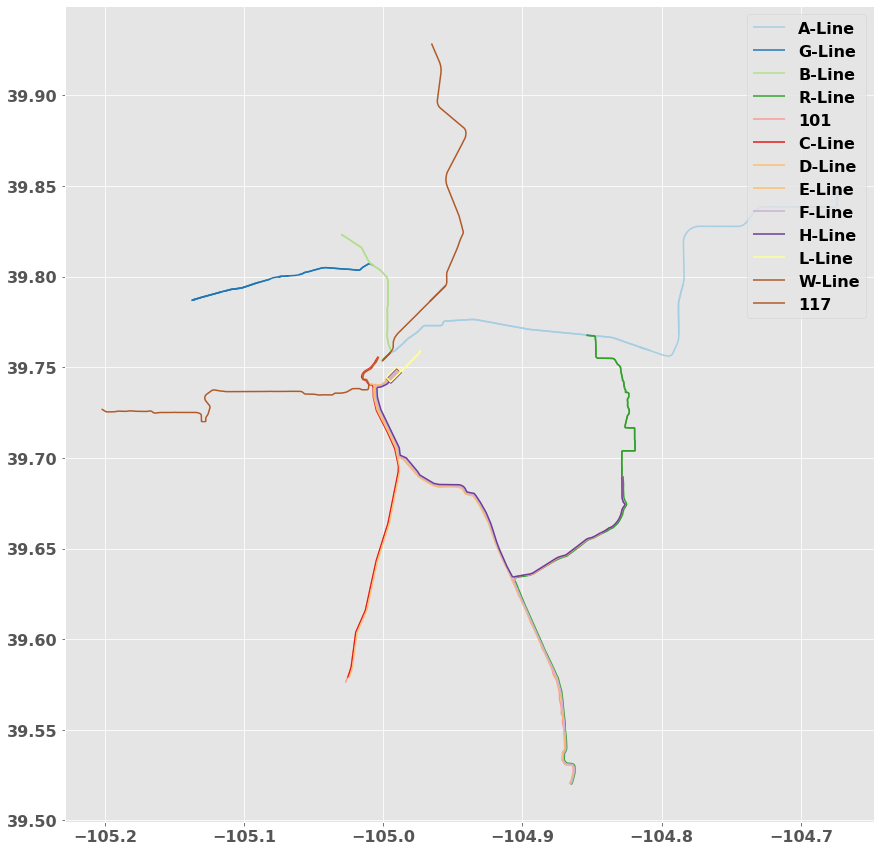

In [145]:
rail_lines = rail_shapes['ROUTE'].unique().tolist()
color_map = cm.get_cmap('Paired', len(rail_lines))
line_colors = color_map(np.linspace(0,1,len(rail_lines)))

fig, ax = plt.subplots(figsize=(15,15))

for line, col in zip(rail_lines, line_colors):
    rail_shapes[rail_shapes['ROUTE'] == line].plot(ax=ax, label=line, color=col)
_ = ax.legend(loc='best')

In [146]:
crs = {'init': 'epsg:4326'}

In [147]:
missing_points = [Point(xy) for xy in zip(missing_stops['vehicle_lng'], missing_stops['vehicle_lat'])]

In [148]:
geo_df = gpd.GeoDataFrame(missing_stops
                          ,crs=crs
                          ,geometry=missing_points)

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


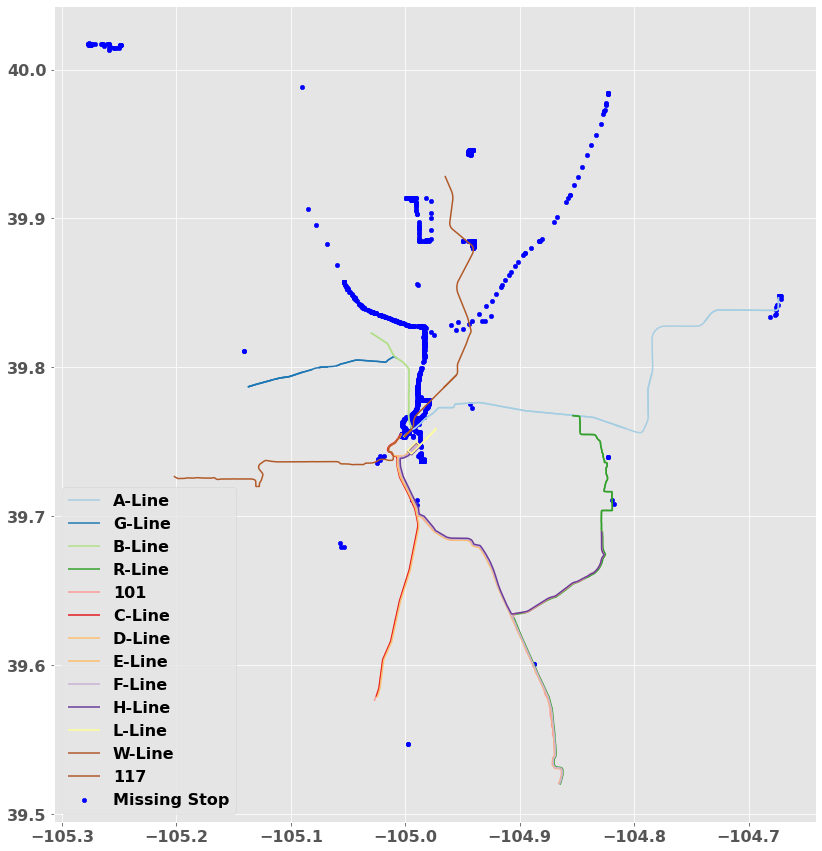

In [151]:
fig, ax = plt.subplots(figsize=(15,15))
for line, col in zip(rail_lines, line_colors):
    rail_shapes[rail_shapes['ROUTE'] == line].plot(ax=ax, label=line, color=col)
geo_df.plot(ax=ax, markersize=20, color="blue", marker="o", label="Missing Stop")
_ = ax.legend(loc='best')